# Efeito da redução de resolução dos sinais

O tipo de montagem utilizado impacta diretamente na reposta em frequência do acelerômetro. Em leituras feitas com acelerômetros magnetizados, por exemplo, distorções começam a aparecer a partir de 5 ou 10 kHz.

Além do mais, o manual dos acelerômetros utilizados recomenda uma faixa de leitura, no caso do acelerômetro triaxial, entre 0.5 Hz e 5 kHz. O sinal foi coletado com uma taxa de aquisição de 50 kHz, acima do permitido.

Testaremos nesse notebook o efeito da redução de amostras e a necessidade de aplicar um filtro anti-aliasing antes da redução da frequência de amostragem, de 50 kHz para 5 kHz.

In [1]:
import pandas as pd
from scipy.signal import decimate
import numpy as np
import matplotlib.pyplot as plt
from initialize import Measurement

import seaborn as sns
sns.set_theme()
sns.set_context("notebook", font_scale=1.2)

In [2]:
ADDRESS = '../mafaulda/vertical-misalignment/1.90mm/56.7296.csv'
AXIS = 'rad1'


original = Measurement(ADDRESS, ratio=1, verbose=True)
naive_downsamp = original.time[0::10].reset_index()
downsamp = Measurement(ADDRESS, ratio=10, verbose=True)


Sinal com shape (250000, 8)
a frequência de aquisição foi reduzida de 50kHz para 50.0kHz


Sinal com shape (25000, 8)
a frequência de aquisição foi reduzida de 50kHz para 5.0kHz



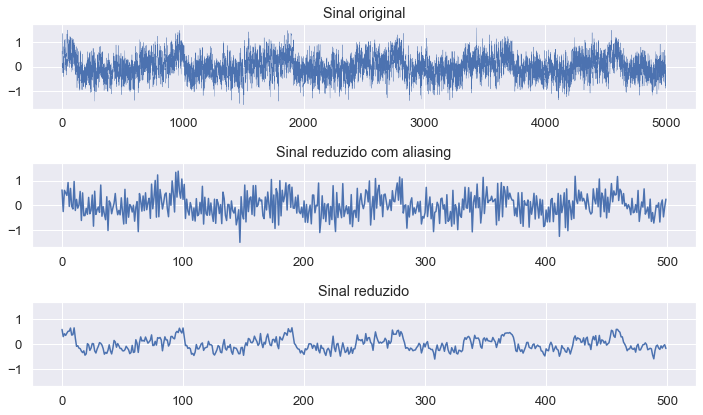

In [3]:
fig, axs = plt.subplots(3,1, figsize = [10,6], sharey=True)

axs[0].plot(original.time[AXIS][:5000], linewidth=.3)
axs[1].plot(naive_downsamp[AXIS][:500])
axs[2].plot(downsamp.time[AXIS][:500])

axs[0].set_title('Sinal original')
axs[1].set_title('Sinal reduzido com aliasing')
axs[2].set_title('Sinal reduzido')

plt.tight_layout()

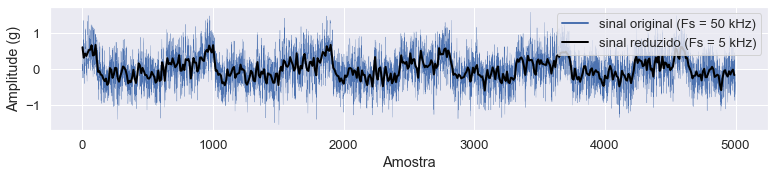

In [4]:
fig, axs = plt.subplots(figsize = [11,2.7], sharey=True)

plt.plot(original.time[AXIS][:5000], linewidth=.25)
plt.plot(np.arange(0,5000,10),downsamp.time[AXIS][:500], linewidth=2, color='black')
axs.set_xlabel('Amostra')
axs.set_ylabel('Amplitude (g)')
leg = axs.legend(['sinal original (Fs = 50 kHz)', 'sinal reduzido (Fs = 5 kHz)'], loc=1)

# seta a largura da linha para cada objeto de legenda
for legobj in leg.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.savefig('../redacao/figuras/aliasing')

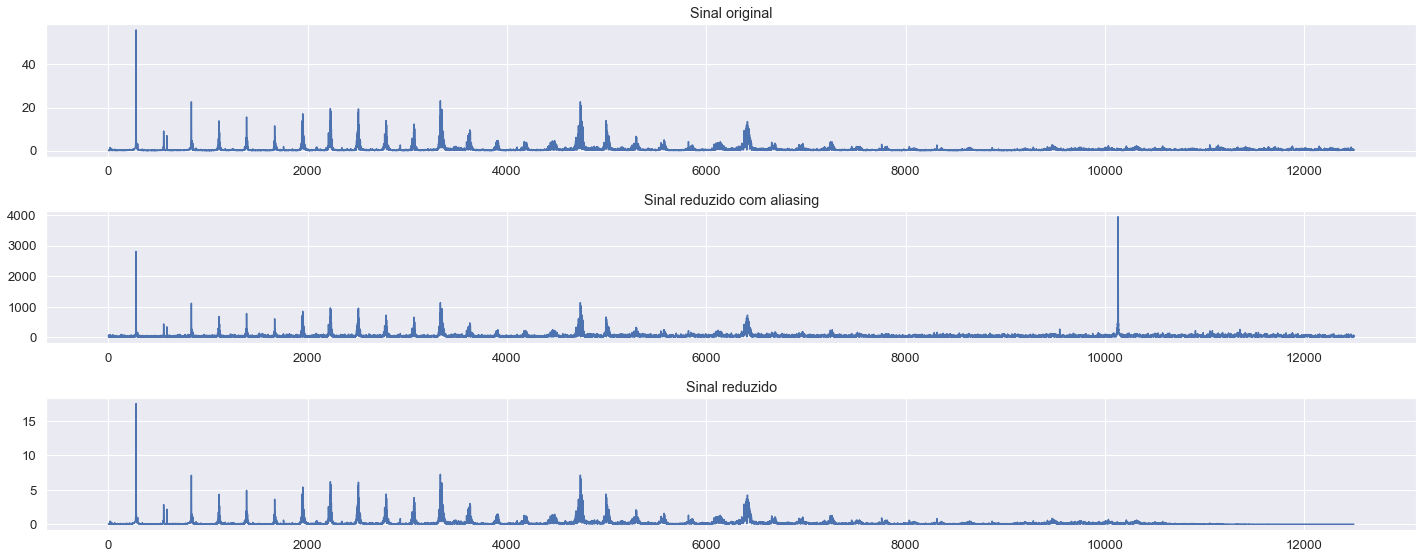

In [5]:
fig, axs = plt.subplots(3,1, figsize = [20,8])

axs[0].plot(original.freq['rad1'][:12500])
axs[1].plot(np.abs(np.fft.rfft(naive_downsamp[AXIS]))[:12500])
axs[2].plot(downsamp.freq['rad1'][:12500])

axs[0].set_title('Sinal original')
axs[1].set_title('Sinal reduzido com aliasing')
axs[2].set_title('Sinal reduzido')

plt.tight_layout()